In [1]:
import os
from tqdm import tqdm, tqdm_notebook
import numpy as np
import pandas as pd
from scipy.misc import imread
import matplotlib.pyplot as plt
from math import *
import cv2

In [2]:
data_path = './driving-data/'
test_path = './test-data/'

img_rows, img_cols = 160, 320

In [3]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
driving_log = pd.read_csv(data_path+'driving_log.csv', names=columns)
test_log = pd.read_csv(test_path+'driving_log.csv', names=columns)

In [4]:
steering = driving_log['steering']
steering2 = test_log['steering']

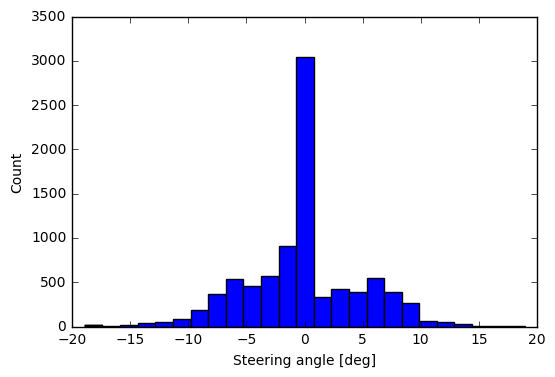

In [5]:
plt.hist(steering*25, bins=25)
plt.xlabel('Steering angle [deg]')
plt.ylabel('Count')
plt.show()

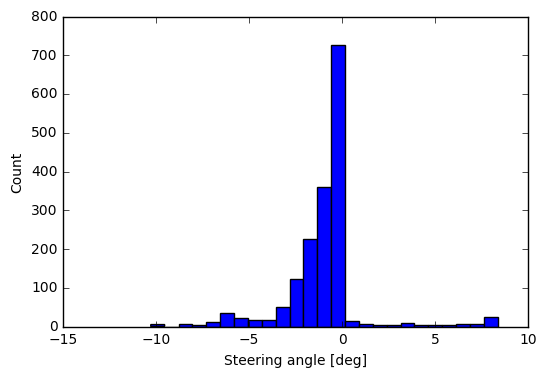

In [6]:
plt.hist(steering2*25, bins=25)
plt.xlabel('Steering angle [deg]')
plt.ylabel('Count')
plt.show()

In [7]:
def image_generator(driving_log, data_path, normalizer=255.0, steering_shift=2., steering_max=25.):
    driving_log = driving_log.sample(frac=1).reset_index(drop=True)
    for index, row in driving_log.iterrows():
        fname  = os.path.basename(row['center'])
        fname1 = os.path.basename(row['left'])
        fname2 = os.path.basename(row['right'])

        # Normalized YUV
        img  = imread(data_path+'IMG/'+fname)
        img1 = imread(data_path+'IMG/'+fname1)
        img2 = imread(data_path+'IMG/'+fname2)

        img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2YUV)
        img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2YUV)
        
        yield img, np.float32(row['steering'])
        yield img1, np.float32(row['steering'])+steering_shift/steering_max
        yield img2, np.float32(row['steering'])-steering_shift/steering_max

In [8]:
img_gen = image_generator(driving_log, 'driving-data/')

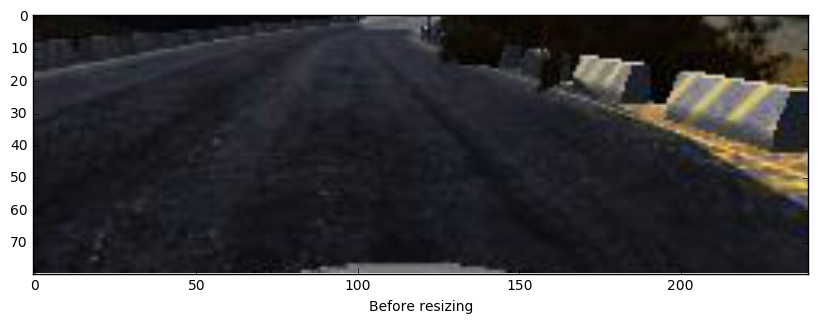

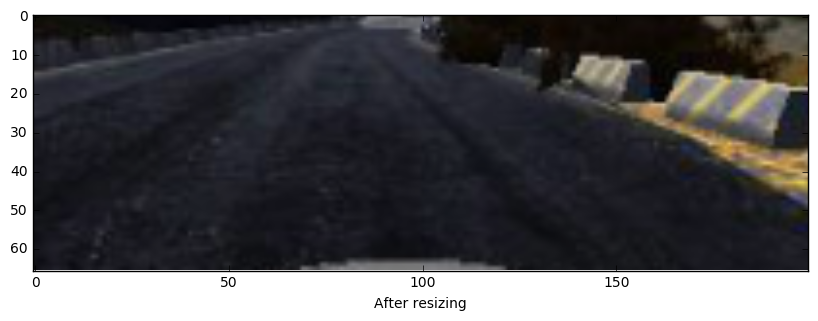

In [9]:
# Test out cropping out region of interest
plt.rcParams["figure.figsize"] = (10,10)

img, angle = next(img_gen)

img = cv2.cvtColor(img, cv2.COLOR_YUV2RGB).astype(np.uint8)
plt.imshow(img[60:140,40:280])
plt.xlabel('Before resizing')

plt.figure()
plt.imshow(cv2.resize(img[60:140,40:280], (200,66)))
plt.xlabel('After resizing')
plt.show()